### Código para descargar y consolidar datos de Quién es quién en los precios de Profeco

La información es de 2015 a 2022

In [1]:
#Librerías
import pandas as pd
import requests
import os
import patoolib
import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import matplotlib.ticker as ticker
import locale

# Locale para Mex
locale.setlocale(locale.LC_ALL, 'es_MX')

'es_MX'

In [4]:
#Cambiar directorio de trabajo
os.chdir("C:/Users/claudio.pacheco/Documents/")
#os.chdir("D:/")
#Crear carpeta. Si ya existe, no la crea
os.makedirs("profeco", exist_ok=True)

In [60]:
#Lista de urls
urls=["https://datos.profeco.gob.mx/datos_abiertos/file.php?t=4ecfa981c01e742a5461bf543a7b4108",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=c388a30cb3f4b4c4fa29302618ef5557",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=059e79ffa462f6f51ed3aa1dbfa83a70",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=01fafa951fb6c82e6e4bb491af8f1688",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=09939d92d2afcde64dbc06e057877e16",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=4df382eefa26f1f0d28d3a11aaf41add",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=493b83b886f0266909d783fc8f776b11",
      "https://datos.profeco.gob.mx/datos_abiertos/file.php?t=af88f42c5cb82c6c35dd962b1ae69051"
      ]

In [4]:
# Define the destination folder for the downloaded files
folder_path = "profeco"

for url in urls:
    # Define the file name and path
    file_name = "temp.rar"
    file_path = os.path.join(folder_path, file_name)
    
    # Download the file
    response = requests.get(url)
    
    # Save the file to the destination folder
    with open(file_path, 'wb') as f:
        f.write(response.content)
    
    # Extract the files from the RAR archive
    patoolib.extract_archive(file_path, outdir=folder_path)
    
    # Remove the RAR file
    os.remove(file_path)


patool: Extracting profeco\temp.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- D:\profeco\temp.rar
patool:     with cwd=profeco


In [7]:
#Concatenar archivos de las carpetas en un solo dataframe
#Lista de carpetas
carpetas = os.listdir("profeco")
#Lista de archivos
archivos = [os.listdir("profeco/"+carpeta) for carpeta in carpetas]

In [8]:
carpetas

['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

In [9]:
archivos

[['012015.csv',
  '022015.csv',
  '032015.csv',
  '042015.csv',
  '052015.csv',
  '062015.csv',
  '072015.csv',
  '082015.csv',
  '092015.csv',
  '102015.csv',
  '112015.csv',
  '122015.csv',
  '132015.csv',
  '142015.csv',
  '152015.csv',
  '162015.csv',
  '172015.csv',
  '182015.csv',
  '192015.csv',
  '202015.csv',
  '212015.csv',
  '222015.csv',
  '232015.csv',
  '242015.csv',
  '252015.csv',
  '262015.csv',
  '272015.csv',
  '282015.csv',
  '292015.csv',
  '302015.csv',
  '312015.csv',
  '322015.csv',
  '332015.csv',
  '342015.csv',
  '352015.csv',
  '362015.csv',
  '372015.csv',
  '382015.csv',
  '392015.csv',
  '402015.csv',
  '412015.csv',
  '422015.csv',
  '432015.csv',
  '442015.csv',
  '452015.csv',
  '462015.csv',
  '472015.csv',
  '482015.csv',
  '492015.csv',
  '502015.csv',
  '512015.csv',
  '522015.csv',
  '532015.csv'],
 ['022016.csv',
  '032016.csv',
  '042016.csv',
  '052016.csv',
  '062016.csv',
  '072016.csv',
  '082016.csv',
  '092016.csv',
  '102016.csv',
  '1120

In [10]:


periodos = ["2015-11-13_2015-11-16",
            "2016-11-18_2016-11-21",
            "2017-11-17_2017-11-20",
            "2018-11-16_2018-11-19",
            "2019-11-15_2019-11-18",
            "2020-11-09_2020-11-20",
            "2021-11-10_2021-11-16",
            "2022-11-18_2022-11-21"]

week_numbers_bf = {}

for periodo in periodos:
    inicio, fin = periodo.split("_")
    inicio_date = datetime.datetime.strptime(inicio, "%Y-%m-%d")
    fin_date = datetime.datetime.strptime(fin, "%Y-%m-%d")
    inicio_year = inicio_date.year
    fin_year = fin_date.year
    week_number_inicio = inicio_date.isocalendar()[1]
    week_number_fin = fin_date.isocalendar()[1]
    if week_number_fin < week_number_inicio:
        week_number_fin = datetime.date(int(fin[:4]), 12, 31).isocalendar()[1]
    if inicio_year == fin_year:
        if inicio_year in week_numbers_bf:
            week_numbers_bf[inicio_year].append(range(week_number_inicio, week_number_fin+1))
        else:
            week_numbers_bf[inicio_year] = [range(week_number_inicio, week_number_fin+1)]
    else:
        if inicio_year in week_numbers_bf:
            week_numbers_bf[inicio_year].append(range(week_number_inicio, 53))
        else:
            week_numbers_bf[inicio_year] = [range(week_number_inicio, 53)]
        for year in range(inicio_year+1, fin_year):
            if year in week_numbers:
                week_numbers_bf[year].append(range(1, 53))
            else:
                week_numbers[year] = [range(1, 53)]
        if fin_year in week_numbers_bf:
            week_numbers_bf[fin_year].append(range(1, week_number_fin+1))
        else:
            week_numbers_bf[fin_year] = [range(1, week_number_fin+1)]

In [11]:
week_numbers_bf

{2015: [range(46, 48)],
 2016: [range(46, 48)],
 2017: [range(46, 48)],
 2018: [range(46, 48)],
 2019: [range(46, 48)],
 2020: [range(46, 48)],
 2021: [range(45, 47)],
 2022: [range(46, 48)]}

In [12]:
# Periods with 4 weeks before and after

periods = ["2015-11-13_2015-11-16",
            "2016-11-18_2016-11-21",
            "2017-11-17_2017-11-20",
            "2018-11-16_2018-11-19",
            "2019-11-15_2019-11-18",
            "2020-11-09_2020-11-20",
            "2021-11-10_2021-11-16",
            "2022-11-18_2022-11-21"]
# Generate list of week numbers for each period
week_numbers = {}
for period in periods:
    start_date, end_date = period.split("_")
    start_week = datetime.datetime.strptime(start_date, "%Y-%m-%d").isocalendar()[1]
    end_week = datetime.datetime.strptime(end_date, "%Y-%m-%d").isocalendar()[1]
    year = int(start_date[:4])
    week_nums = []
    for week in range(start_week-4, end_week+5):
        if week < 1:
            year -= 1
            week_nums.append(52 + week)
        elif week > 52:
            year += 1
            week_nums.append(week - 52)
        else:
            week_nums.append(week)
    if year not in week_numbers:
        week_numbers[year] = []
    week_numbers[year].append(week_nums)


In [13]:
week_numbers

{2015: [[42, 43, 44, 45, 46, 47, 48, 49, 50, 51]],
 2016: [[42, 43, 44, 45, 46, 47, 48, 49, 50, 51]],
 2017: [[42, 43, 44, 45, 46, 47, 48, 49, 50, 51]],
 2018: [[42, 43, 44, 45, 46, 47, 48, 49, 50, 51]],
 2019: [[42, 43, 44, 45, 46, 47, 48, 49, 50, 51]],
 2020: [[42, 43, 44, 45, 46, 47, 48, 49, 50, 51]],
 2021: [[41, 42, 43, 44, 45, 46, 47, 48, 49, 50]],
 2022: [[42, 43, 44, 45, 46, 47, 48, 49, 50, 51]]}

In [14]:
archivos_buenfin = []
for i in range(len(archivos)):
    for j in range(len(archivos[i])):
        year = archivos[i][j][2:6]
        week_number = archivos[i][j][0:2]
        # Filtrar por semana con base en el diccionario week_numbers
        if int(year) in week_numbers:
            for week in week_numbers[int(year)]:
                if int(week_number) in week:
                    archivos_buenfin.append(archivos[i][j])
                    break

In [15]:
archivos_buenfin

['422015.csv',
 '432015.csv',
 '442015.csv',
 '452015.csv',
 '462015.csv',
 '472015.csv',
 '482015.csv',
 '492015.csv',
 '502015.csv',
 '512015.csv',
 '422016.csv',
 '432016.csv',
 '442016.csv',
 '452016.csv',
 '462016.csv',
 '472016.csv',
 '482016.csv',
 '492016.csv',
 '502016.csv',
 '512016.csv',
 '422017.csv',
 '432017.csv',
 '442017.csv',
 '452017.csv',
 '462017.csv',
 '472017.csv',
 '482017.csv',
 '492017.csv',
 '502017.csv',
 '512017.csv',
 '422018.csv',
 '432018.csv',
 '442018.csv',
 '452018.csv',
 '462018.csv',
 '472018.csv',
 '482018.csv',
 '492018.csv',
 '502018.csv',
 '512018.csv',
 '422019.csv',
 '432019.csv',
 '442019.csv',
 '452019.csv',
 '462019.csv',
 '472019.csv',
 '482019.csv',
 '492019.csv',
 '502019.csv',
 '512019.csv',
 '422020.csv',
 '432020.csv',
 '442020.csv',
 '452020.csv',
 '462020.csv',
 '472020.csv',
 '482020.csv',
 '492020.csv',
 '502020.csv',
 '512020.csv',
 '412021.csv',
 '422021.csv',
 '432021.csv',
 '442021.csv',
 '452021.csv',
 '462021.csv',
 '472021.c

In [16]:
#Leer los archivos filtrados
df = pd.DataFrame()
for archivo in archivos_buenfin:
    df_temp = pd.read_csv("profeco/"+archivo[2:6]+"/"+archivo, encoding="utf-8",names=["producto",
                                                                  "presentacion",
                                                                  "marca",
                                                                  "categoria",
                                                                  "catalogo",
                                                                  "precio",
                                                                  "fecharegistro",
                                                                  "cadenacomercial",
                                                                    "giro",
                                                                    "nombrecomercial",
                                                                    "direccion",
                                                                    "estado",
                                                                    "municipio",
                                                                    "latitud",
                                                                    "longitud",
                                                                  ])
    df=pd.concat([df,df_temp],ignore_index=True)
    print("Archivo "+archivo+" leído")

Archivo 422015.csv leído
Archivo 432015.csv leído
Archivo 442015.csv leído
Archivo 452015.csv leído
Archivo 462015.csv leído
Archivo 472015.csv leído
Archivo 482015.csv leído
Archivo 492015.csv leído
Archivo 502015.csv leído
Archivo 512015.csv leído
Archivo 422016.csv leído
Archivo 432016.csv leído
Archivo 442016.csv leído
Archivo 452016.csv leído
Archivo 462016.csv leído
Archivo 472016.csv leído
Archivo 482016.csv leído
Archivo 492016.csv leído
Archivo 502016.csv leído
Archivo 512016.csv leído
Archivo 422017.csv leído
Archivo 432017.csv leído
Archivo 442017.csv leído
Archivo 452017.csv leído
Archivo 462017.csv leído
Archivo 472017.csv leído
Archivo 482017.csv leído
Archivo 492017.csv leído
Archivo 502017.csv leído
Archivo 512017.csv leído
Archivo 422018.csv leído
Archivo 432018.csv leído
Archivo 442018.csv leído
Archivo 452018.csv leído
Archivo 462018.csv leído
Archivo 472018.csv leído
Archivo 482018.csv leído
Archivo 492018.csv leído
Archivo 502018.csv leído
Archivo 512018.csv leído


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21658296 entries, 0 to 21658295
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   producto         object 
 1   presentacion     object 
 2   marca            object 
 3   categoria        object 
 4   catalogo         object 
 5   precio           float64
 6   fecharegistro    object 
 7   cadenacomercial  object 
 8   giro             object 
 9   nombrecomercial  object 
 10  direccion        object 
 11  estado           object 
 12  municipio        object 
 13  latitud          float64
 14  longitud         float64
dtypes: float64(3), object(12)
memory usage: 2.4+ GB


In [19]:
#Filtrar electrodomésticos
electrodomesticos = df[df["catalogo"]=="ELECTRODOMESTICOS"]
electrodomesticos["fecharegistro"] = pd.to_datetime(electrodomesticos["fecharegistro"], format="%Y-%m-%d")

C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\1934804542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electrodomesticos["fecharegistro"] = pd.to_datetime(electrodomesticos["fecharegistro"], format="%Y-%m-%d")


In [20]:
#Print precio medio y mediano para cada año
for year in range(2015,2023):
    print("Precio medio y mediano para el año "+str(year))
    print(electrodomesticos[electrodomesticos["fecharegistro"].dt.year==year]["precio"].agg(["mean","median"]))
    print("")

Precio medio y mediano para el año 2015
mean      4315.537062
median    2399.000000
Name: precio, dtype: float64

Precio medio y mediano para el año 2016
mean      4814.949772
median    3098.000000
Name: precio, dtype: float64

Precio medio y mediano para el año 2017
mean      5725.673986
median    3789.000000
Name: precio, dtype: float64

Precio medio y mediano para el año 2018
mean      5585.716984
median    3599.000000
Name: precio, dtype: float64

Precio medio y mediano para el año 2019
mean      5982.475925
median    4299.000000
Name: precio, dtype: float64

Precio medio y mediano para el año 2020
mean      6210.030425
median    4754.500000
Name: precio, dtype: float64

Precio medio y mediano para el año 2021
mean      6846.266575
median    4599.000000
Name: precio, dtype: float64

Precio medio y mediano para el año 2022
mean      6741.326178
median    4997.000000
Name: precio, dtype: float64



In [21]:
#Crear semana de registro
electrodomesticos["semana_registro"] = electrodomesticos["fecharegistro"].dt.isocalendar().week

C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\1117968008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electrodomesticos["semana_registro"] = electrodomesticos["fecharegistro"].dt.isocalendar().week


In [59]:
electrodomesticos["fecharegistro"].min()

Timestamp('2015-10-12 00:00:00')

In [22]:
productos=electrodomesticos["producto"].unique()
productos

array(['BATIDORAS', 'CAFETERAS', 'CAMARAS DIGITALES',
       'COMPONENTES DE AUDIO', 'EXTRACTORES DE JUGOS Y EXPRIMIDORES',
       'PANTALLAS', 'PLANCHAS', 'RADIOGRABADORAS', 'DVD / BLU RAY',
       'ESTUFAS', 'HORNO DE MICROONDAS', 'LAVADORAS', 'LICUADORAS',
       'REFRIGERADORES', 'SISTEMAS DE TEATRO EN CASA HOME THEATER',
       'TOSTADORES DE PAN', 'VENTILADORES', 'SANDWICHERAS',
       'ELECTRONICOS DE VIDEO', 'OLLA DE PRESION EXPRESS',
       'HORNO ELECTRICO', 'AIRES ACONDICIONADOS', 'VIDEOCAMARAS',
       'BOCINAS PORTÁTILES', 'CELULARES', 'SARTÉN', 'SECADORAS',
       'CENTRO DE LAVADO', 'COMPUTADORAS PORTÁTILES', 'TABLET',
       'BATERÍA DE COCINA', 'BARRA DE SONIDO', 'REPRODUCTORES STREAMING',
       'HORNO ELÉCTRICO', 'ASPIRADORAS', 'FREIDORAS DE AIRE',
       'ASISTENTES DE VOZ', 'MINIBOCINAS PORTÁTILES BLUETOOTH',
       'PLANCHAS DE VAPOR VERTICAL'], dtype=object)

In [23]:
#Convertir lista de productos en dataframe
df_productos = pd.DataFrame(productos,columns=["producto"])
df_productos
#Salvar en excel
pd.DataFrame.to_excel(df_productos,"profeco/productos.xlsx",index=False)

In [33]:
electrodomesticos["cadenacomercial"].unique()

array(['BODEGA AURRERA', 'COPPEL', 'SORIANA', 'SEARS ROEBUCK DE MEXICO',
       'WAL-MART', 'BODEGA COMERCIAL MEXICANA', 'CHEDRAUI', 'ELEKTRA',
       'COMERCIAL MEXICANA', 'FAMSA', 'LIVERPOOL', 'MERCADO SORIANA',
       'I.M.S.S.', 'HIPERMERCADO SORIANA', 'BECERRIL AIR',
       'LEY (AUTOSERVICIO)', 'SALINAS Y ROCHA', 'SORIANA SUPER',
       'CASA LEY', 'MEGA COMERCIAL', 'LEY EXPRESS', 'MUEBLERIAS',
       'MEGA COMERCIAL MEXICANA', 'COLCHONES Y MUEBLES DE CAMPECHE',
       'MEGA SORIANA', 'ULTRA HOGAR', 'MUEBLERIA CREDILAND',
       'MUEBLERIA FABRICAS DE FRANCIA', 'TIENDAS CONTINO',
       'MUEBLERIAS PORTILLO', 'S MART', 'ALSUPER STORE',
       'GALA DISEÑO EN MUEBLES, S.A. DE C.V.', 'CIMACO', 'LA COMER',
       'U.N.A.M.', 'PALACIO DE HIERRO', 'BEST BUY', 'SUPER GURIERREZ',
       'H.E.B.', 'OPERADORA MERCO', 'MUEBLERIAS EL GALLO',
       'SORIANA EXPRESS', 'SUPERAMA', 'RYSE', 'EKAR DE GAS',
       'MUEBLES AMERICA', 'MUEBLERIA EL GRAN SALTO', 'MUEBLERIA ELIZONDO',
       'MUEBLER

In [35]:
#Contar registros por cadena comercial
registros_cadenas = electrodomesticos["cadenacomercial"].value_counts()

In [41]:
#Hacerlo como dataframe
df_registros_cadenas = pd.DataFrame(registros_cadenas)
#Crear columna con porcentaje
df_registros_cadenas["porcentaje"] = df_registros_cadenas["cadenacomercial"]/df_registros_cadenas["cadenacomercial"].sum()*100

In [45]:
#Mostrar todas las filas
pd.set_option('display.max_rows', None)
df_registros_cadenas

cadenacomercial  porcentaje
COPPEL                                         552038   20.595213
LIVERPOOL                                      276152   10.302568
WAL-MART                                       252691    9.427295
ELEKTRA                                        222712    8.308850
HIPERMERCADO SORIANA                           195203    7.282555
SEARS ROEBUCK DE MEXICO                        191243    7.134817
CHEDRAUI                                       168662    6.292374
MEGA SORIANA                                   157906    5.891094
FAMSA                                          129726    4.839766
BODEGA AURRERA                                  97247    3.628052
BEST BUY                                        61728    2.302924
SORIANA                                         49463    1.845346
MUEBLERIA FABRICAS DE FRANCIA                   41779    1.558674
LA COMER                                        40472    1.509913
SALINAS Y ROCHA                                 37691    1.406161
PALACIO DE HIERRO                               23610    0.880832
MERCADO SORIANA                                 23146    0.863522
H.E.B.                                          21592    0.805546
MUEBLERIAS                                      14012    0.522754
CIMACO                                          10164    0.379194
LEY (AUTOSERVICIO)                               9578    0.357332
ELECTRODOMESTICOS CHAPUR                         7342    0.273912
MEGA ELEKTRA                                     6595    0.246044
CHEDRAUI SELECTO                                 6568    0.245036
TIENDAS CONTINO                                  6239    0.232762
EKAR DE GAS                                      5021    0.187321
MUEBLERIA CREDILAND                              4899    0.182770
SORIANA SUPER                                    4893    0.182546
I.M.S.S.                                         4823    0.179935
MUEBLERIA EL GRAN SALTO                          4714    0.175868
MEGA COMERCIAL MEXICANA                          4642    0.173182
MUEBLERIA ELIZONDO                               4557    0.170011
TELEBODEGA                                       3811    0.142179
CASA LEY                                         3653    0.136285
LA MARINA                                        3514    0.131099
RYSE                                             3137    0.117034
ELECTROMUEBLES                                   2848    0.106252
ULTRA HOGAR                                      2789    0.104051
EL BODEGON                                       1908    0.071183
U.N.A.M.                                         1855    0.069206
COLCHONES Y MUEBLES DE CAMPECHE                  1853    0.069131
SORIANA EXPRESS                                  1799    0.067116
MUEBLES AMERICA                                  1698    0.063348
COMERCIAL MEXICANA                               1622    0.060513
MUEBLERIAS PORTILLO                              1611    0.060103
MUEBLERIA MAYA                                   1334    0.049768
DEPARTAMENTAL DEL SOL                            1116    0.041635
MEGA COMERCIAL                                   1113    0.041523
MUEBLERIA FOTO CONTINO                            760    0.028354
ISSSTEZAC                                         710    0.026488
SUPER AKI XTRA                                    633    0.023616
SUPER AKI                                         623    0.023243
BODEGA COMERCIAL MEXICANA                         616    0.022981
OFFICE DEPOT                                      544    0.020295
MUEBLERIA GUADALUPANA                             512    0.019101
SUPERMERCADOS LEY                                 477    0.017796
S MART                                            370    0.013804
MI TIENDA DEL AHORRO                              312    0.011640
SUPER CHEDRAUI                                    219    0.008170
GALA DISEÑO EN MUEBLES, S.A. DE C.V.              198    0.007387
MUEBLERIAS E

In [25]:
for period in periods:
        start_date, end_date = period.split("_")
        start_week = datetime.datetime.strptime(start_date, "%Y-%m-%d").isocalendar()[1]
        end_week = datetime.datetime.strptime(end_date, "%Y-%m-%d").isocalendar()[1]
        print("Periodo "+str(start_week)+"-"+str(end_week))


Periodo 46-47
Periodo 46-47
Periodo 46-47
Periodo 46-47
Periodo 46-47
Periodo 46-47
Periodo 45-46
Periodo 46-47


C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\2943616951.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\2943616951.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\2943616951.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric

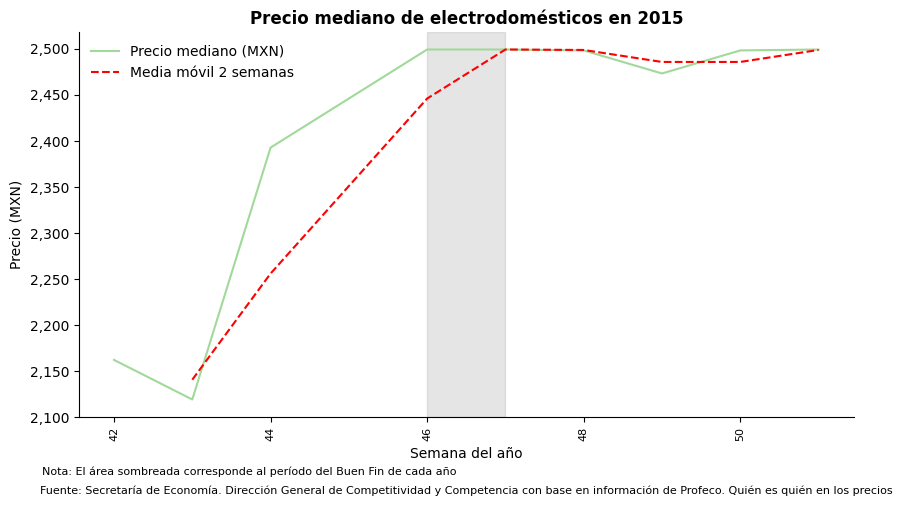

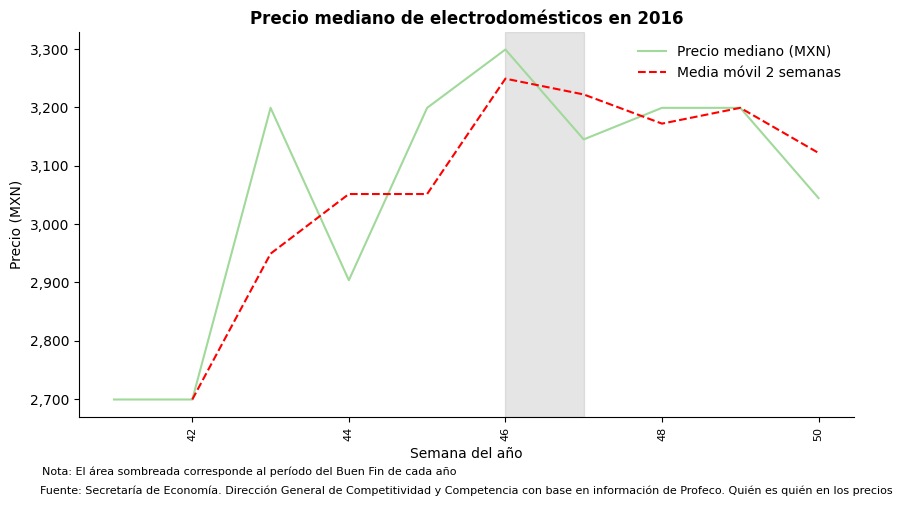

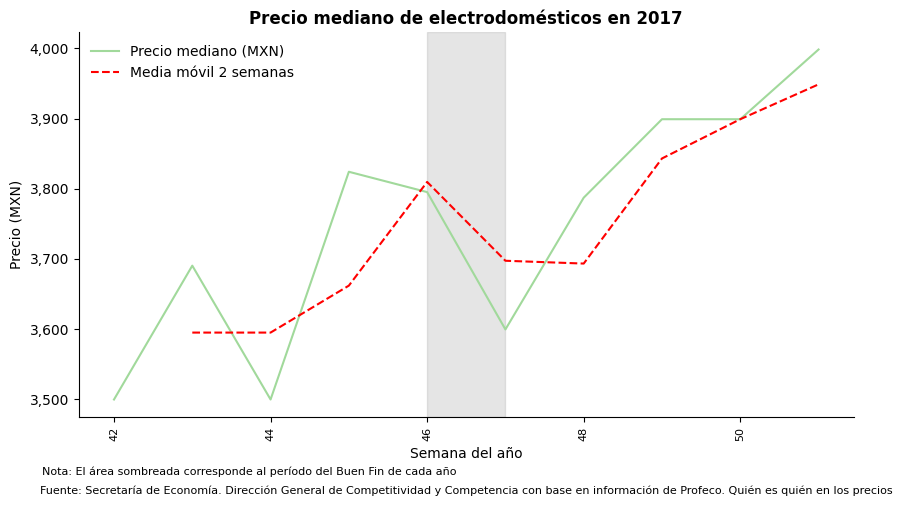

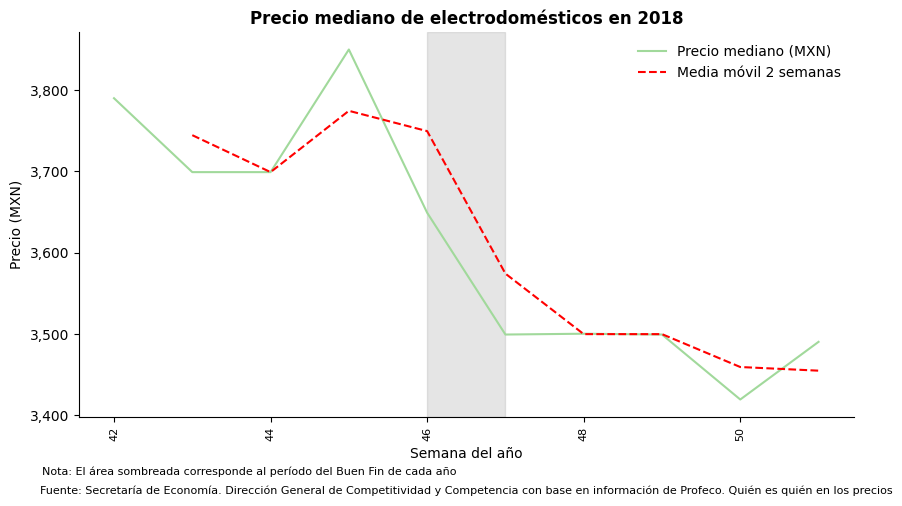

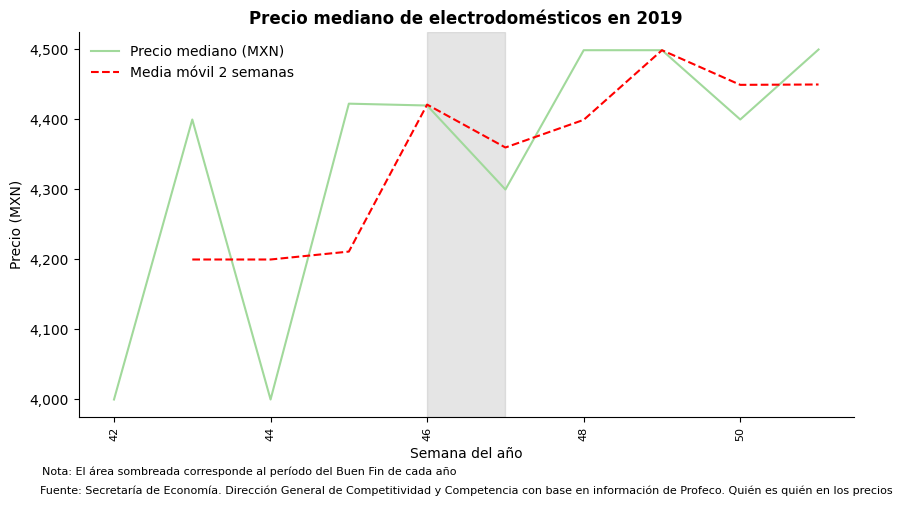

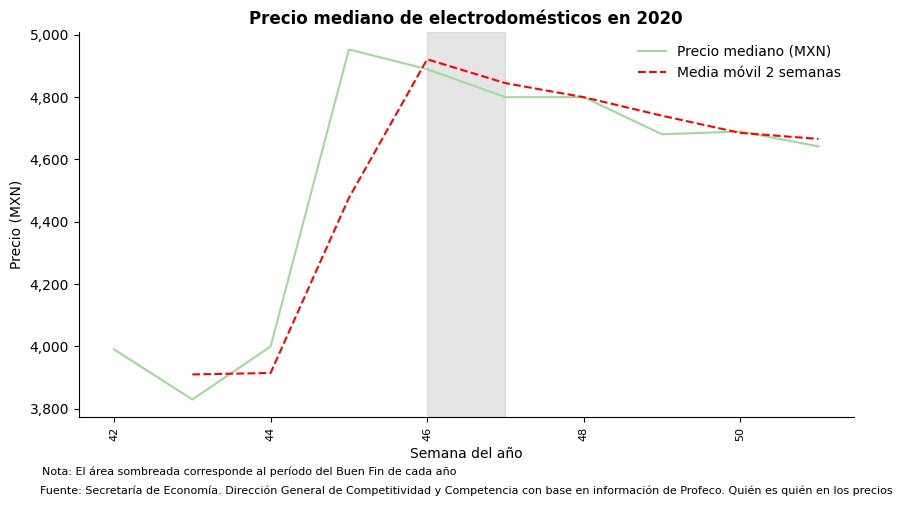

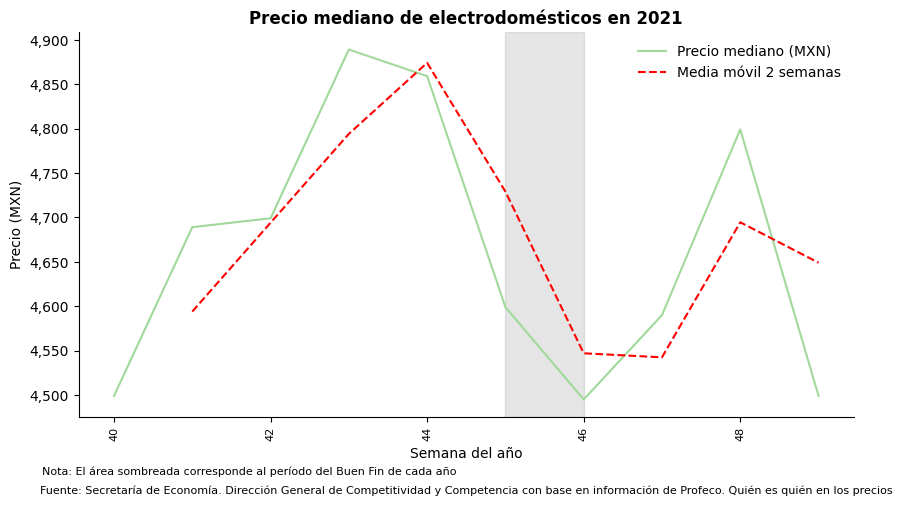

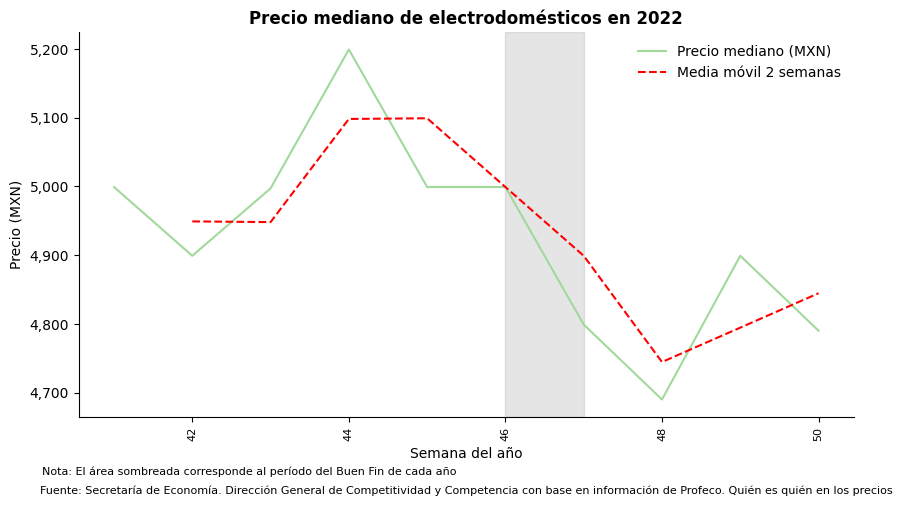

In [26]:
#Graficar precio medio de electrodomésticos para cada año. Quiero el registro de cada semana. Utilizar la función elementos_grafica()
for year in electrodomesticos["fecharegistro"].dt.year.unique():
    
    electrodomesticos_year = electrodomesticos[electrodomesticos["fecharegistro"].dt.year==year]
    electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
    electrodomesticos_max = electrodomesticos_year["precio"].max()
    electrodomesticos_min = electrodomesticos_year["precio"].min()
    electrodomesticos_year.plot(y="precio",figsize=(10,5),color="#a1d99b")
    #Gráficar max y min
    #plt.axhline(electrodomesticos_max, color="r", linestyle="--")
    #plt.axhline(electrodomesticos_min, color="r", linestyle="--")
    #media movil de 4 semanas
    electrodomesticos_year["precio"].rolling(2).median().plot(figsize=(10,5),style="r--")
    #Precio máximo
    #Incluir área de Buen Fin con base en la lista periods. Poner el área en gris con transparencia 0.2 y etiquetarla con "Buen Fin"
    for period in periods:
        start_date, end_date = period.split("_")
        start_week = datetime.datetime.strptime(start_date, "%Y-%m-%d").isocalendar()[1]
        end_week = datetime.datetime.strptime(end_date, "%Y-%m-%d").isocalendar()[1]
        if year == int(start_date[:4]):
            plt.axvspan(start_week, end_week, alpha=0.2, color='grey')
            #plt.text(start_week+1, (electrodomesticos_year["precio"].min() + electrodomesticos_year["precio"].max())/2, "Buen Fin", size=8, weight="bold")


            # Add titles, labels and legend
    plt.xticks(rotation=90, size=8)
    plt.grid(False)
    plt.title("Precio mediano de electrodomésticos en "+str(year), size=12, weight="bold")
    plt.xlabel("Semana del año")
    plt.ylabel("Precio (MXN)")
    plt.legend(['Precio mediano (MXN)','Media móvil 2 semanas'], frameon=False)
        #Eliminar los bordes
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Eje y con separadores de miles
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    #Añadir fuente
    
    plt.text(0.22, -0.15, "Nota: El área sombreada corresponde al período del Buen Fin de cada año", size=8, ha="center", transform=plt.gca().transAxes)
    plt.text(0.5, -0.2, "Fuente: Secretaría de Economía. Dirección General de Competitividad y Competencia con base en información de Profeco. Quién es quién en los precios", size=8, ha="center", transform=plt.gca().transAxes)
    #Salvar la gráfica
    plt.savefig("profeco/precio_med_elect_sem_"+str(year)+".png", bbox_inches="tight",transparent=True)


C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\1606875799.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\1606875799.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\1606875799.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, nume

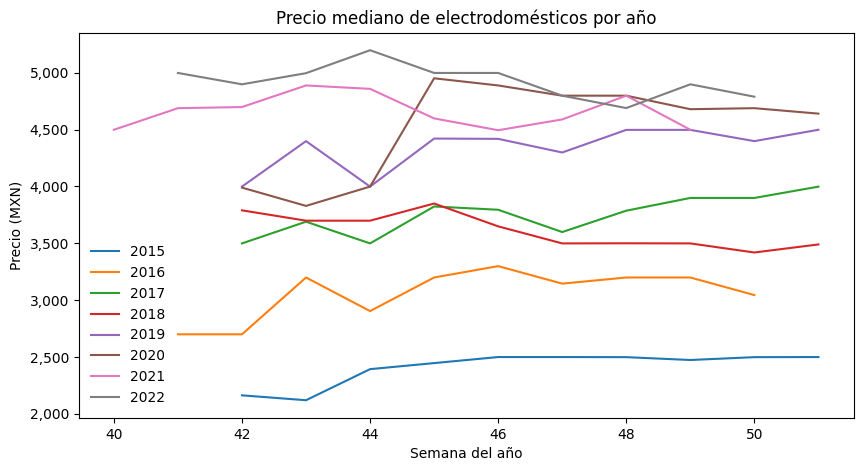

In [51]:
import matplotlib.pyplot as plt

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5))

# loop over years and add each line to the same axis
for year in electrodomesticos["fecharegistro"].dt.year.unique():
    
    electrodomesticos_year = electrodomesticos[electrodomesticos["fecharegistro"].dt.year==year]
    electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
    ax.plot(electrodomesticos_year["precio"], label=str(year))

# add titles, labels and legend
ax.set_xlabel("Semana del año")
ax.set_ylabel("Precio (MXN)")
ax.set_title("Precio mediano de electrodomésticos por año")
ax.legend(frameon=False)

# format the y-axis with separators
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# display the graph
plt.show()


C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\3986953109.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\3986953109.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\3986953109.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, nume

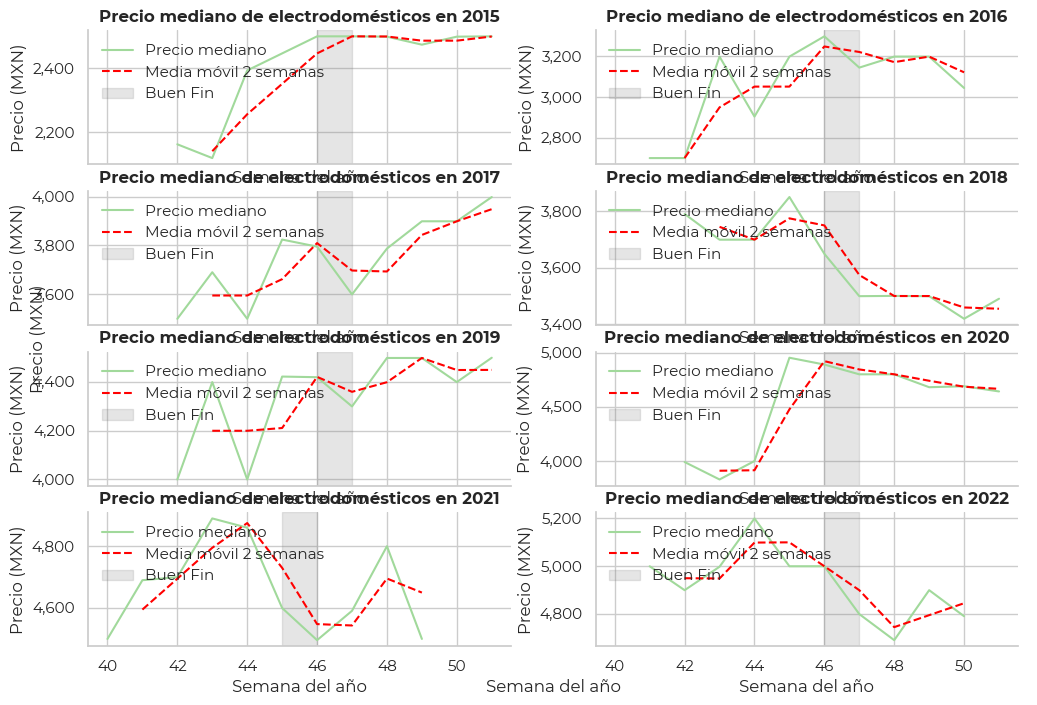

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

plt.rcParams["font.family"] = "Montserrat"
# Create a figure with subplots for each year
years = electrodomesticos["fecharegistro"].dt.year.unique()
nrows = np.ceil(len(years) / 2).astype(int)
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 2*nrows), sharex=True, sharey=False)

# Loop over years and plot data on corresponding subplot
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Subset data for current year
    electrodomesticos_year = electrodomesticos[electrodomesticos["fecharegistro"].dt.year == year]
    electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()

    # Plot median price and rolling mean
    ax.plot(electrodomesticos_year["precio"], color="#a1d99b", label="Precio mediano")
    ax.plot(electrodomesticos_year["precio"].rolling(2).median(), color="red", linestyle="--", label="Media móvil 2 semanas")

    # Add shaded area for Buen Fin
    for period in periods:
        start_date, end_date = period.split("_")
        start_week = datetime.datetime.strptime(start_date, "%Y-%m-%d").isocalendar()[1]
        end_week = datetime.datetime.strptime(end_date, "%Y-%m-%d").isocalendar()[1]
        if year == int(start_date[:4]):
            ax.axvspan(start_week, end_week, alpha=0.2, color='grey', label="Buen Fin")

    # Set title and labels
    ax.set_title(f"Precio mediano de electrodomésticos en {year}", size=12, weight="bold")
    ax.set_xlabel("Semana del año")
    ax.set_ylabel("Precio (MXN)")

    # Format y-axis ticks with thousands separator
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

    # Add legend and remove spines
    ax.legend(frameon=False, loc="upper left")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Add common x- and y-axis labels and save the figure
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Semana del año")
plt.ylabel("Precio (MXN)")
plt.savefig("profeco/precio_med_elect_subplot.png", bbox_inches="tight",transparent=True)


C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\3392393892.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\3392393892.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()
C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\3392393892.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, nume

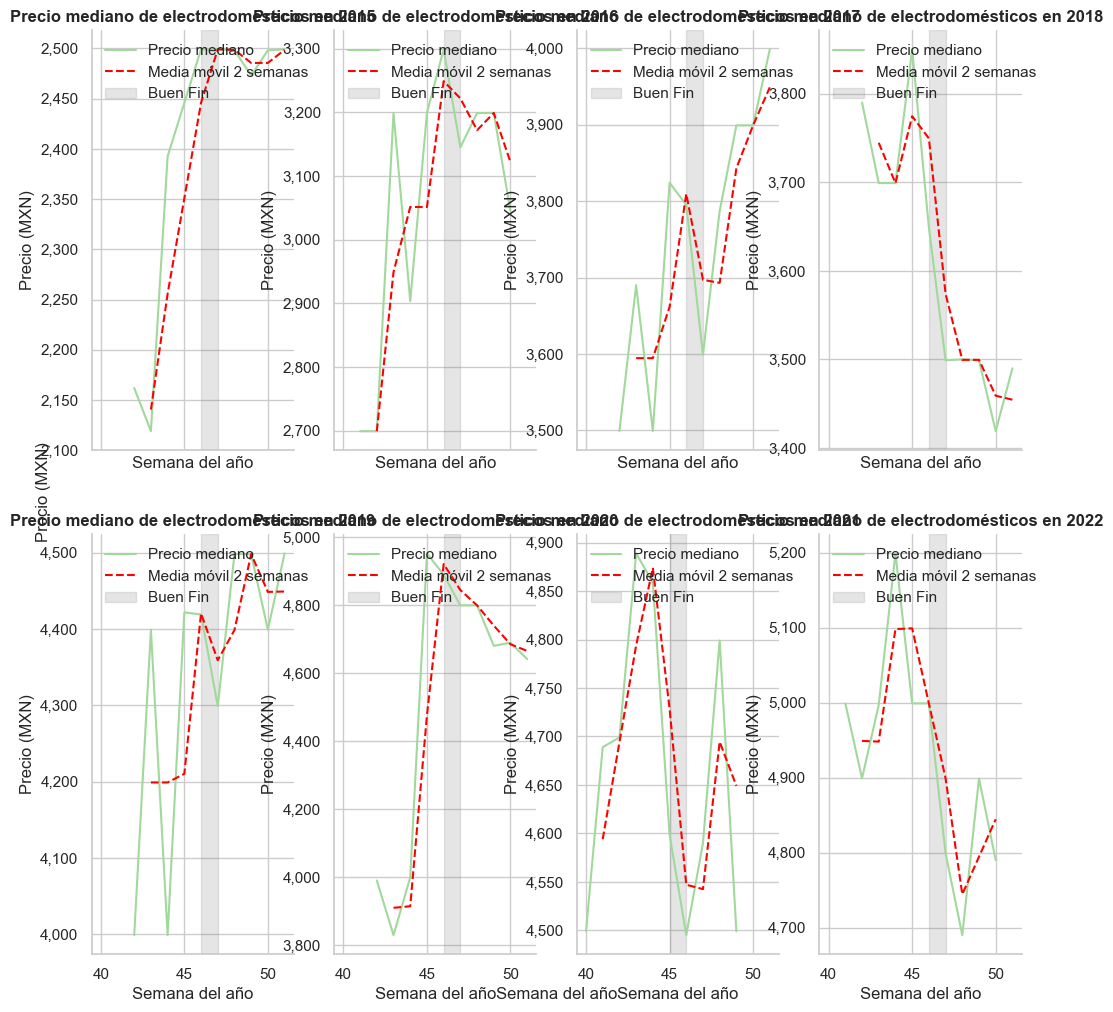

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Create a figure with subplots for each year
years = electrodomesticos["fecharegistro"].dt.year.unique()
nrows = 2
ncols = 4
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6*nrows), sharex=True, sharey=False)

# Loop over years and plot data on corresponding subplot
for i, year in enumerate(years):
    row = i // ncols
    col = i % ncols
    ax = axs[row, col]

    # Subset data for current year
    electrodomesticos_year = electrodomesticos[electrodomesticos["fecharegistro"].dt.year == year]
    electrodomesticos_year = electrodomesticos_year.groupby("semana_registro").median()

    # Plot median price and rolling mean
    ax.plot(electrodomesticos_year["precio"], color="#a1d99b", label="Precio mediano")
    ax.plot(electrodomesticos_year["precio"].rolling(2).median(), color="red", linestyle="--", label="Media móvil 2 semanas")

    # Add shaded area for Buen Fin
    for period in periods:
        start_date, end_date = period.split("_")
        start_week = datetime.datetime.strptime(start_date, "%Y-%m-%d").isocalendar()[1]
        end_week = datetime.datetime.strptime(end_date, "%Y-%m-%d").isocalendar()[1]
        if year == int(start_date[:4]):
            ax.axvspan(start_week, end_week, alpha=0.2, color='grey', label="Buen Fin")

    # Set title and labels
    ax.set_title(f"Precio mediano de electrodomésticos en {year}", size=12, weight="bold")
    ax.set_xlabel("Semana del año")
    ax.set_ylabel("Precio (MXN)")

    # Format y-axis ticks with thousands separator
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

    # Add legend and remove spines
    ax.legend(frameon=False, loc="upper left")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Add common x- and y-axis labels and save the figure
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("Semana del año")
plt.ylabel("Precio (MXN)")
plt.savefig("profeco/precio_med_elect_subplot.png", bbox_inches="tight",transparent=True)


C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\413270544.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("fecharegistro").median()
C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\413270544.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("fecharegistro").median()
C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\413270544.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only w

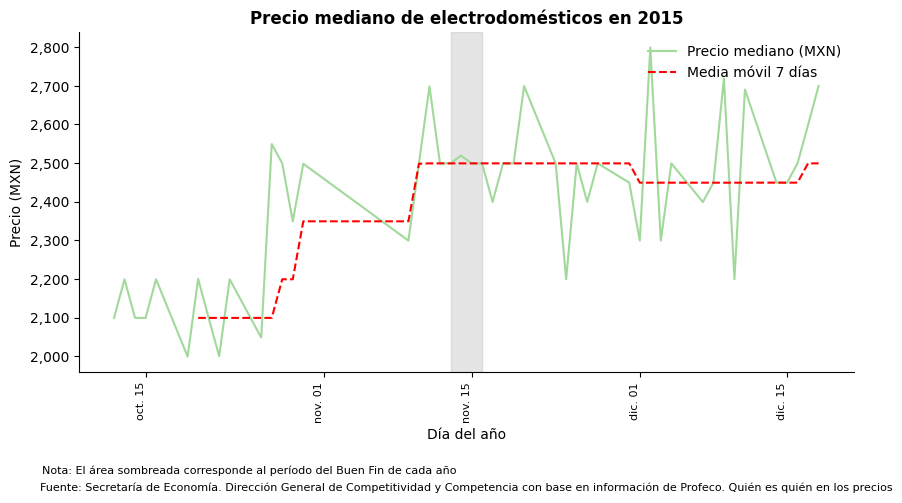

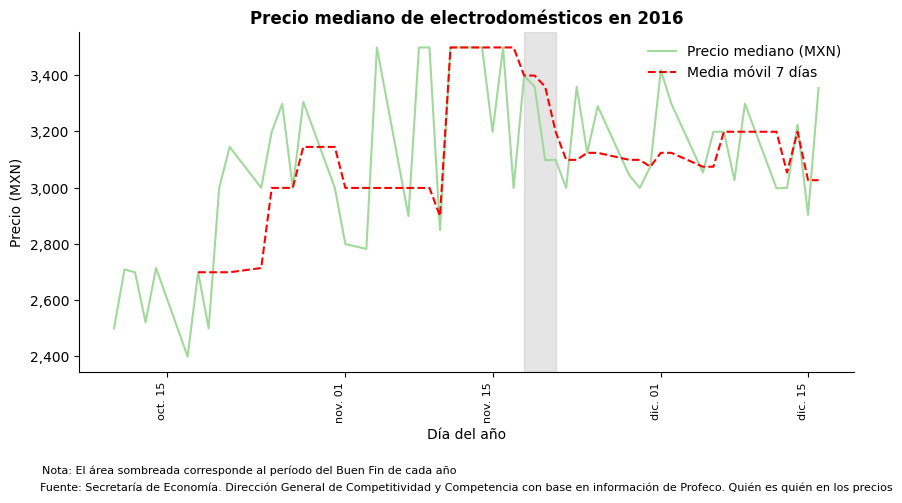

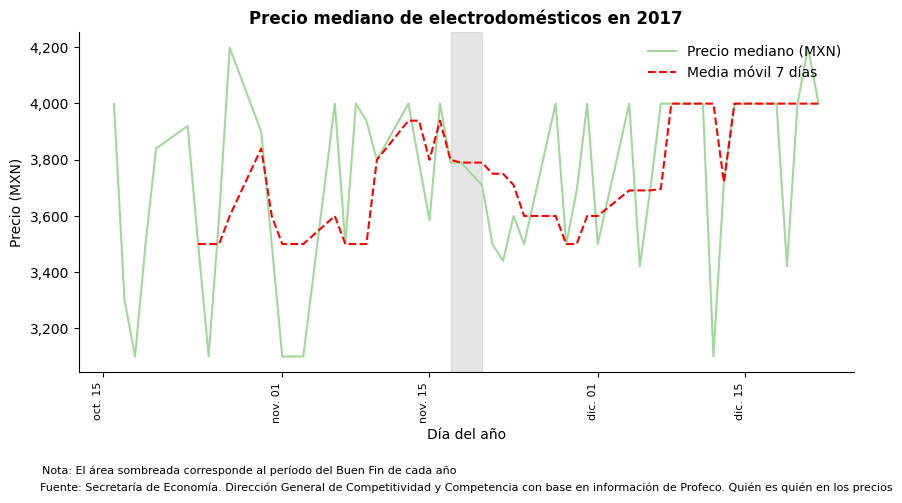

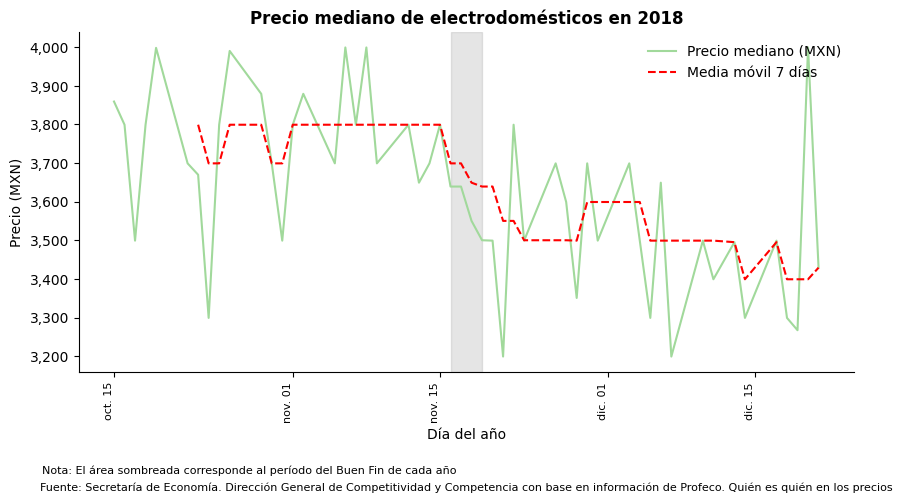

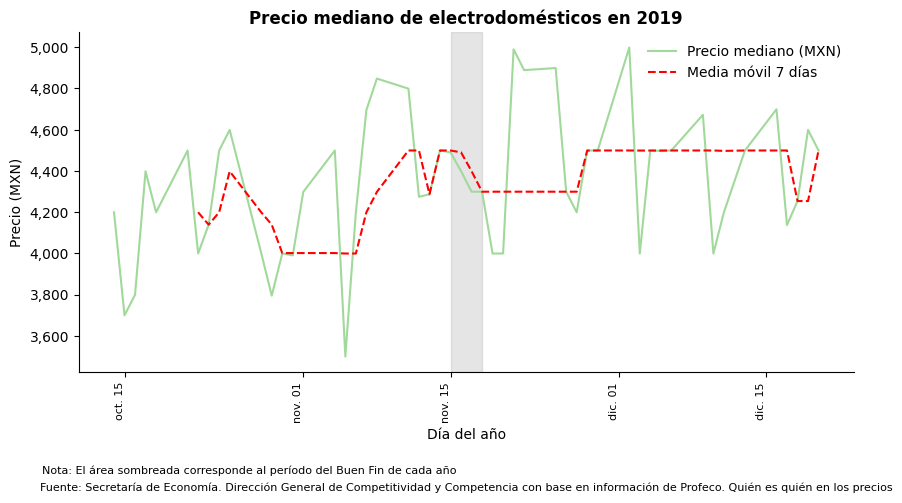

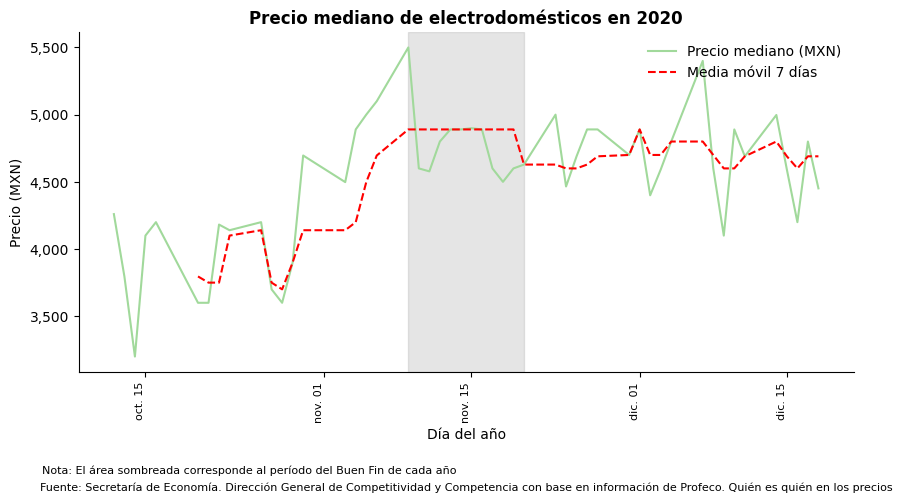

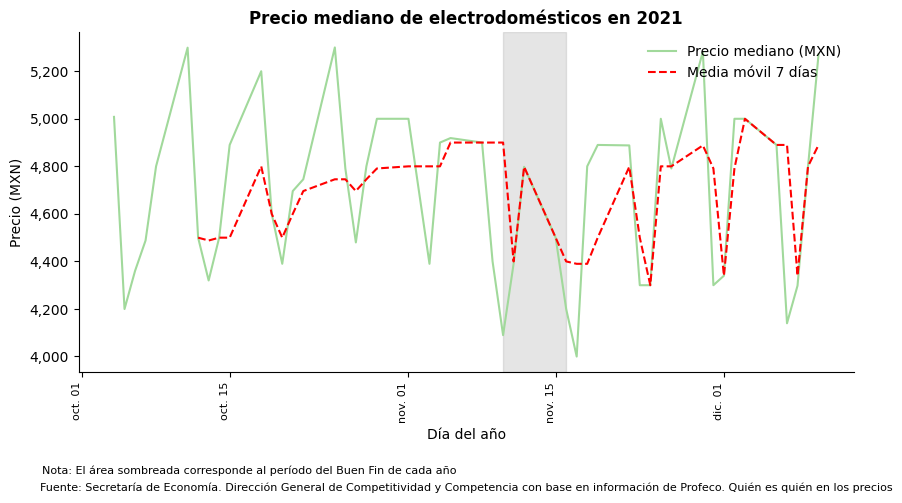

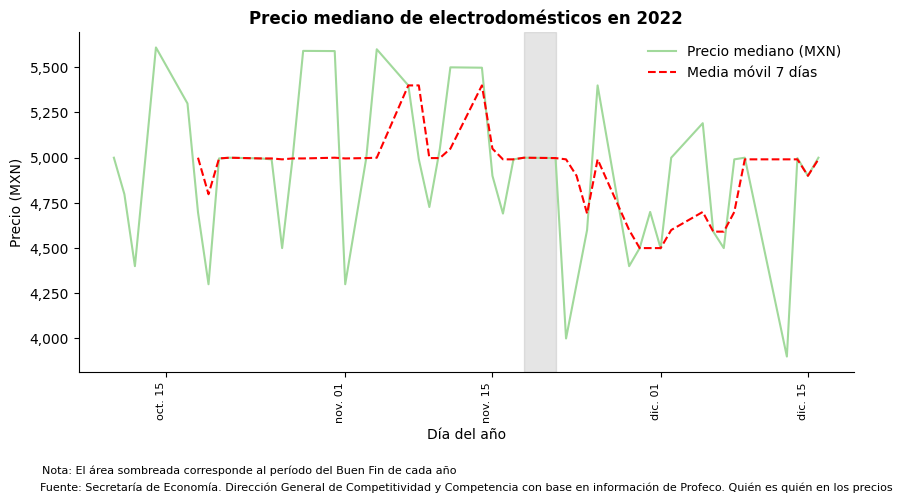

In [27]:
#fmt = ticker.LocaleFormatter(locale.getlocale())

#Graficar los datos por día para cada año
for year in electrodomesticos["fecharegistro"].dt.year.unique():
    electrodomesticos_year = electrodomesticos[electrodomesticos["fecharegistro"].dt.year==year]
    electrodomesticos_year = electrodomesticos_year.groupby("fecharegistro").median()
    electrodomesticos_year.plot(y="precio",figsize=(10,5),color="#a1d99b")
    #media movil de 4 semanas
    electrodomesticos_year["precio"].rolling(7).median().plot(figsize=(10,5),style="r--")
    #Precio máximo
    electrodomesticos_max = electrodomesticos_year["precio"].max()
    electrodomesticos_min = electrodomesticos_year["precio"].min()
    #plt.axhline(electrodomesticos_max, color="r", linestyle="--")
    #plt.axhline(electrodomesticos_min, color="r", linestyle="--")
    #Incluir área de Buen Fin con base en la lista periods. Poner el área en gris con transparencia 0.2 y etiquetarla con "Buen Fin"
    for period in periods:
        start_date, end_date = period.split("_")
        start_week = datetime.datetime.strptime(start_date, "%Y-%m-%d")
        end_week = datetime.datetime.strptime(end_date, "%Y-%m-%d")
        if year == int(start_date[:4]):
            plt.axvspan(start_week, end_week, alpha=0.2, color='grey')
            #plt.text(start_week+1, (electrodomesticos_year["precio"].min() + electrodomesticos_year["precio"].max())/2, "Buen Fin", size=8, weight="bold")


            # Add titles, labels and legend
    plt.xticks(rotation=90, size=8)
    plt.grid(False)
    plt.title("Precio mediano de electrodomésticos en "+str(year), size=12, weight="bold")
    plt.xlabel("Día del año")
    plt.ylabel("Precio (MXN)")
    plt.legend(['Precio mediano (MXN)','Media móvil 7 días'], frameon=False,loc='upper right')
        #Eliminar los bordes
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Eje y con separadores de miles
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    #Eje x con fechas en formato corto con mes en texto corto
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    #Añadir fuente
    
    plt.text(0.22, -0.3, "Nota: El área sombreada corresponde al período del Buen Fin de cada año", size=8, ha="center", transform=plt.gca().transAxes)
    plt.text(0.5, -0.35, "Fuente: Secretaría de Economía. Dirección General de Competitividad y Competencia con base en información de Profeco. Quién es quién en los precios", size=8, ha="center", transform=plt.gca().transAxes)
    plt.savefig("profeco/precio_med_elect_dia_"+str(year)+".png", bbox_inches="tight",transparent=True)

C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\3451575617.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("fecharegistro").median()
C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\3451575617.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electrodomesticos_year = electrodomesticos_year.groupby("fecharegistro").median()
C:\Users\claudio.pacheco\AppData\Local\Temp\ipykernel_16184\3451575617.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_onl

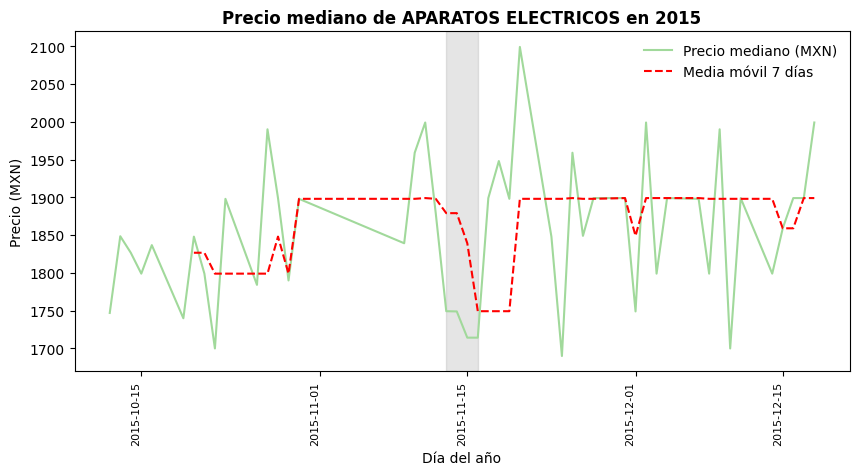

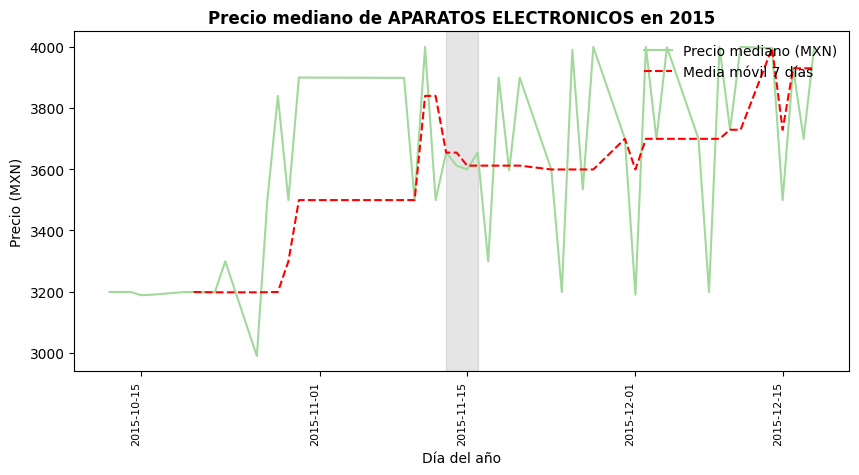

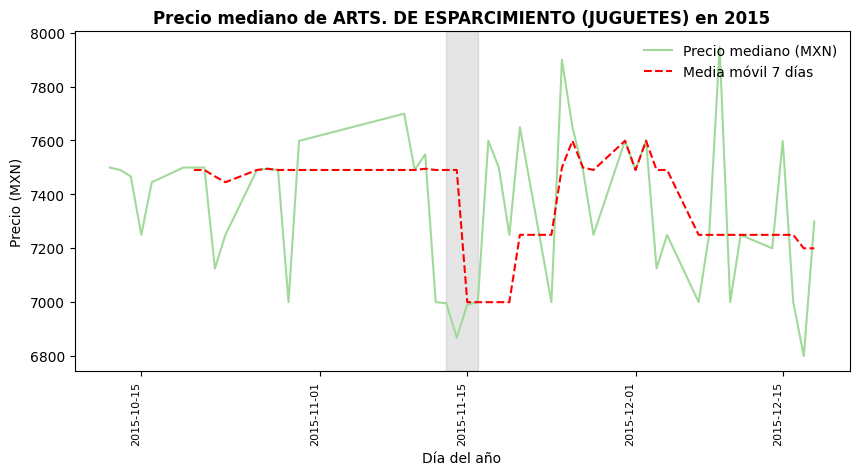

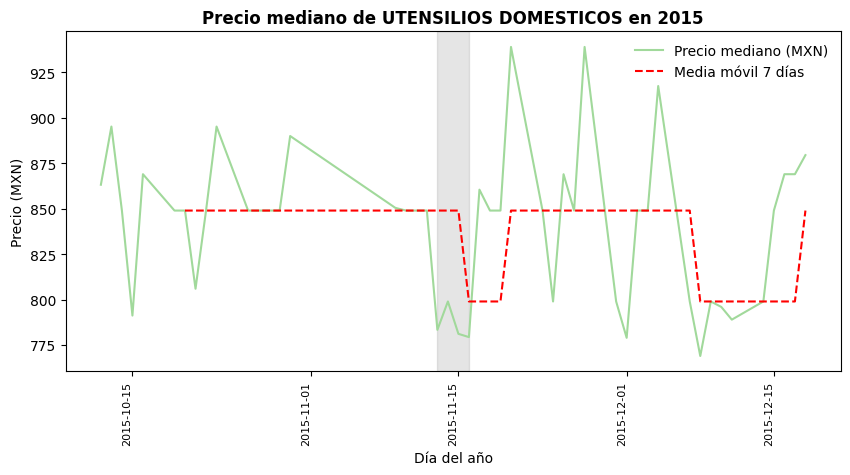

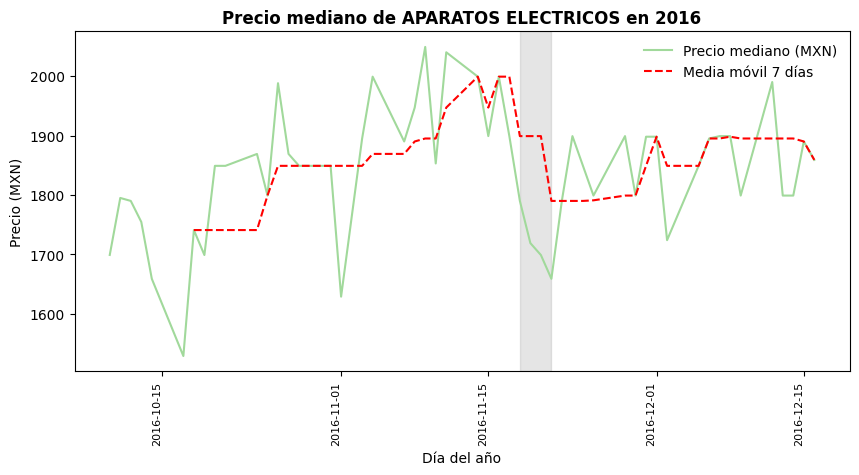

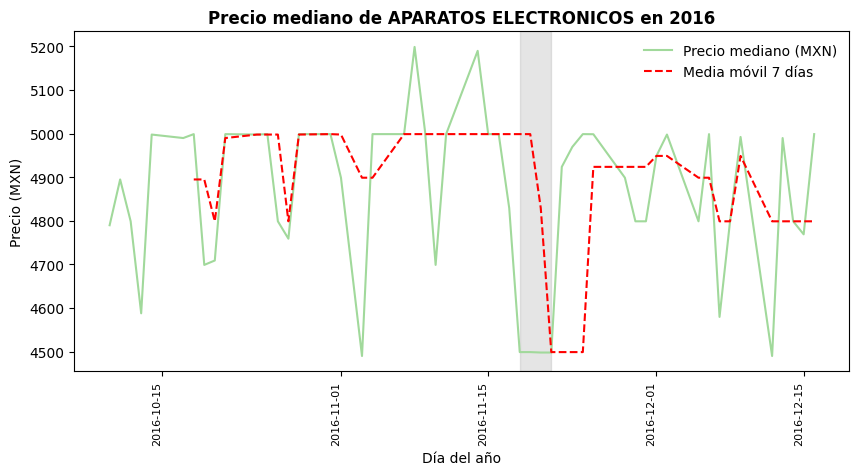

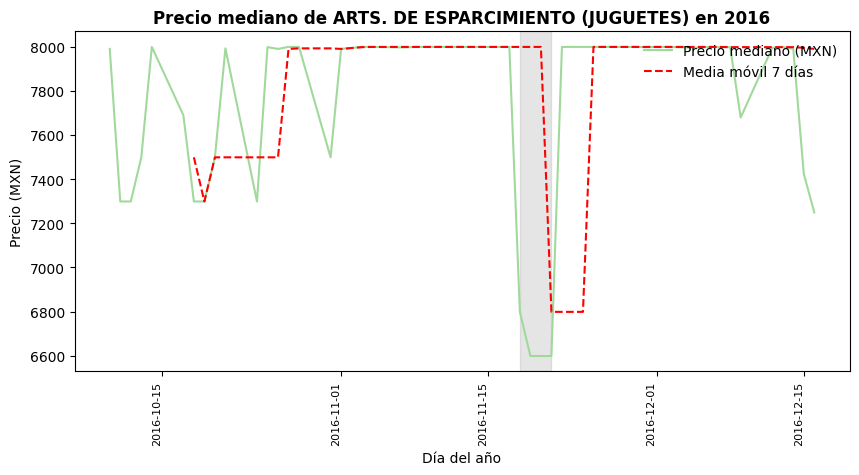

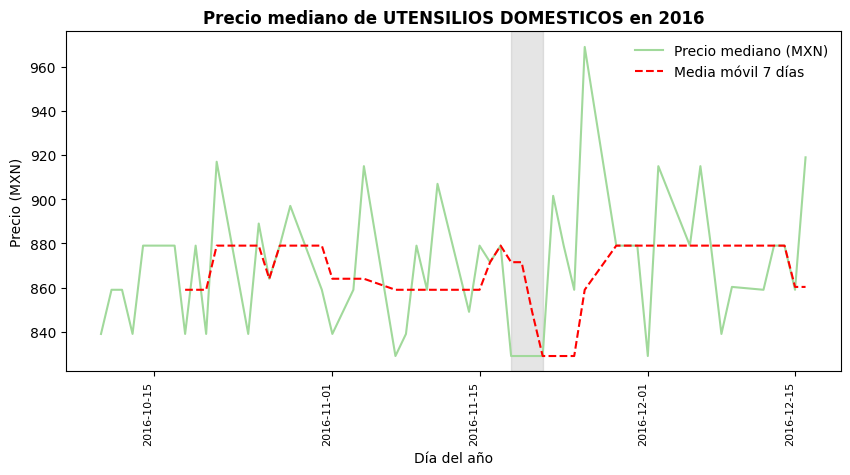

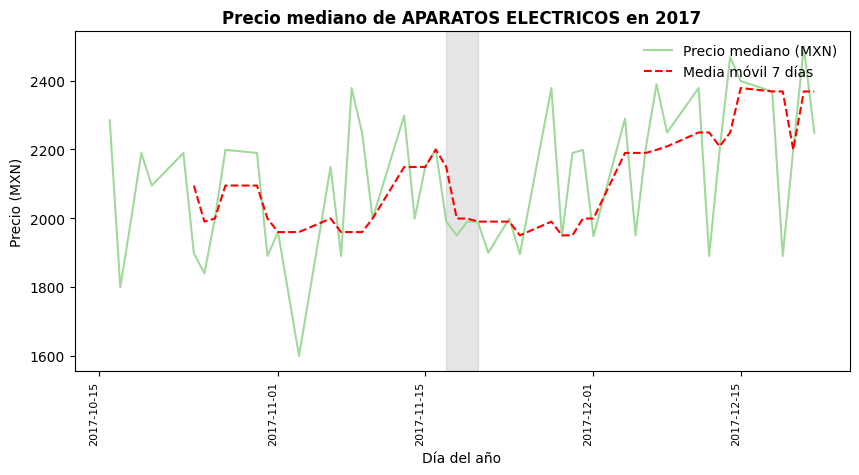

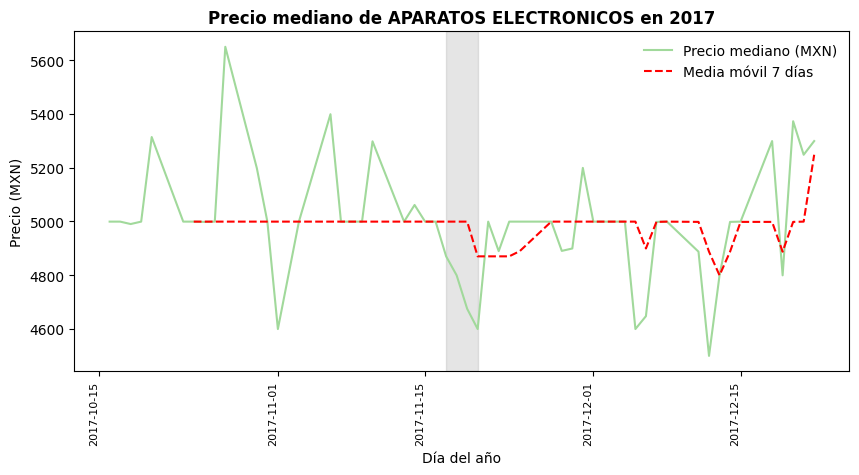

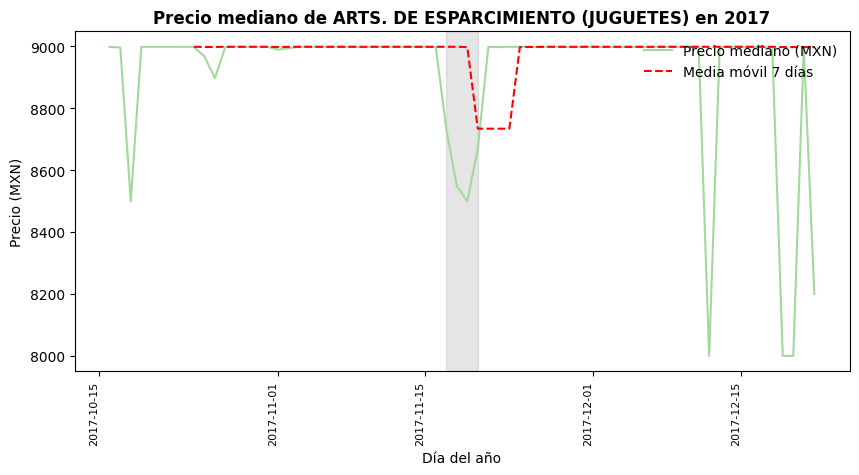

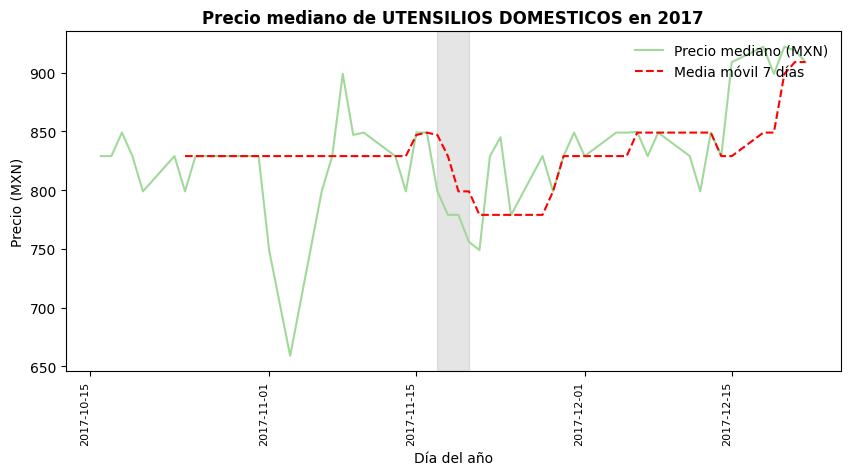

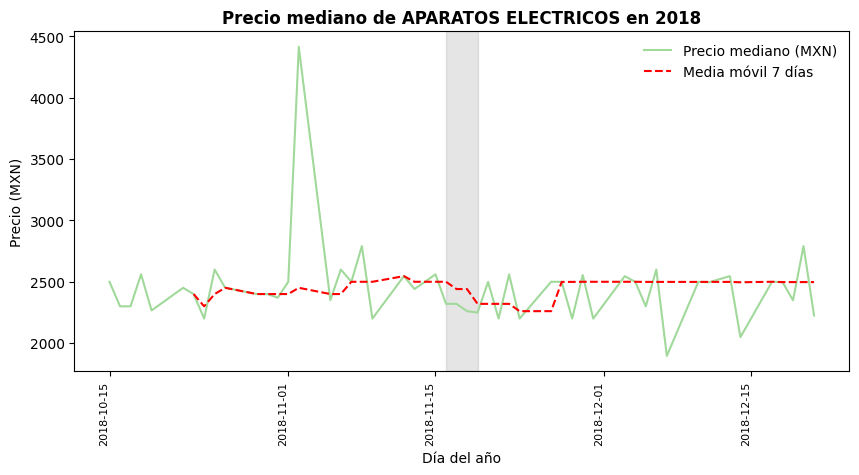

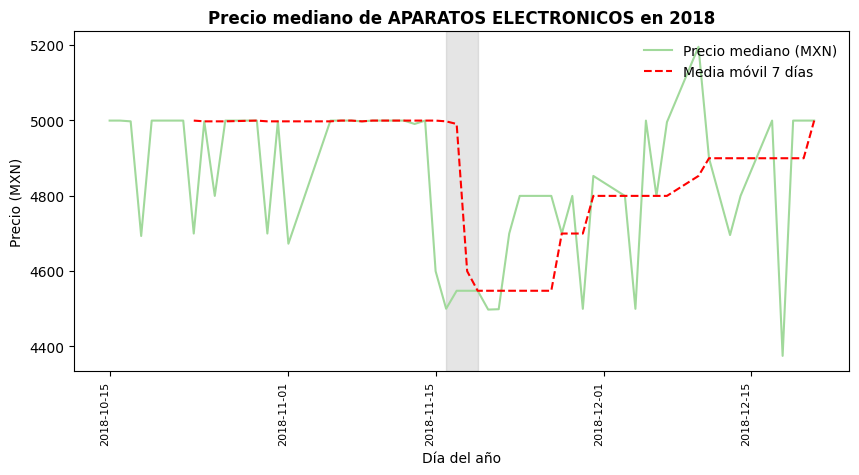

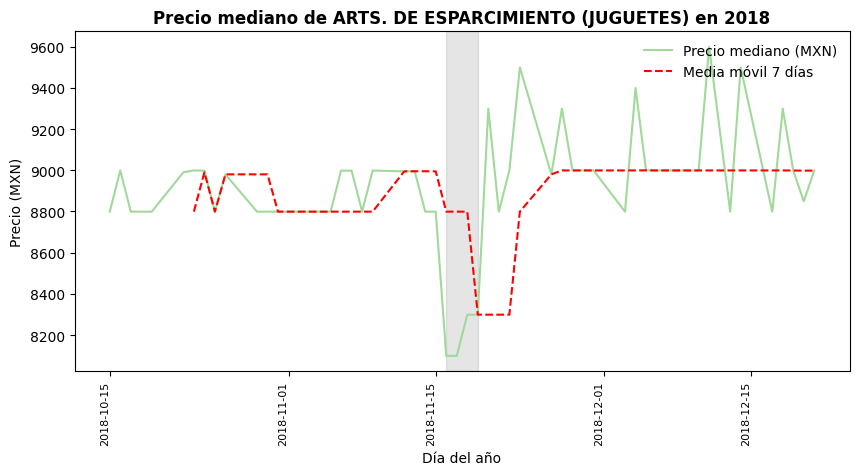

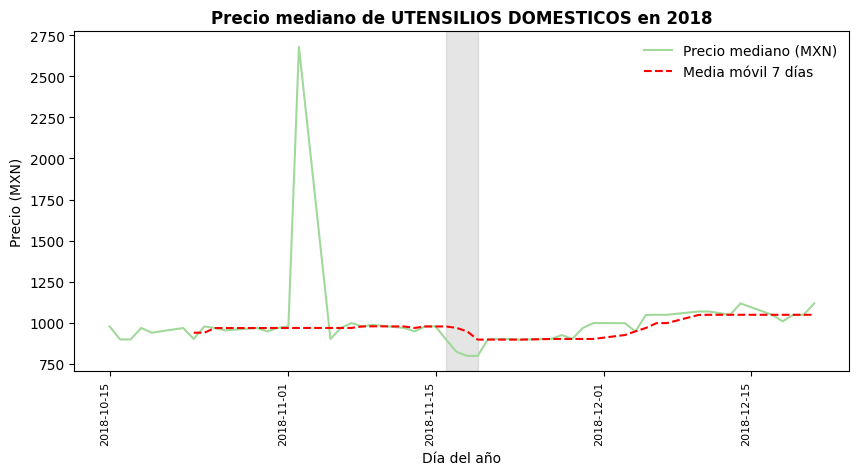

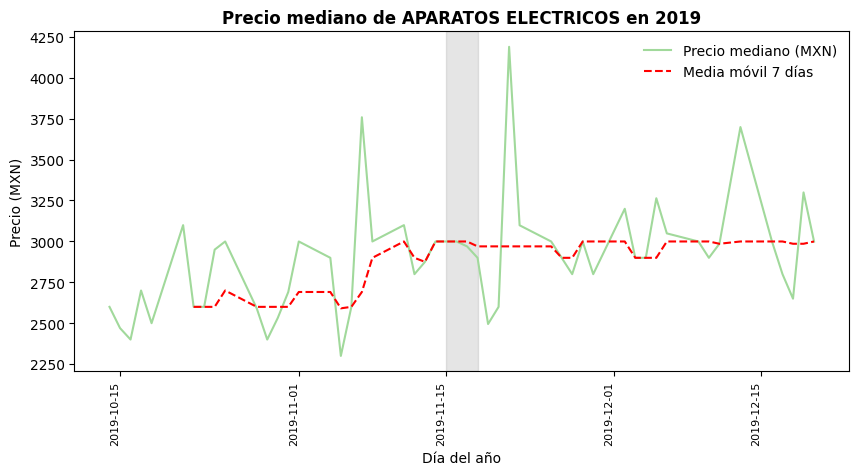

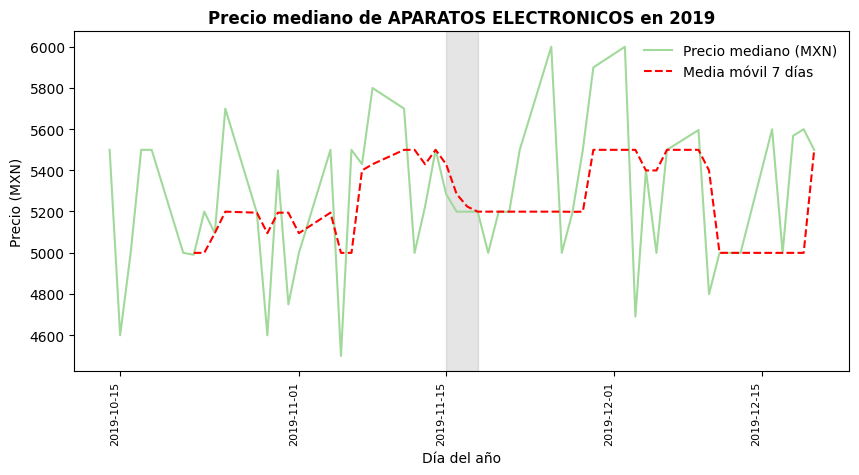

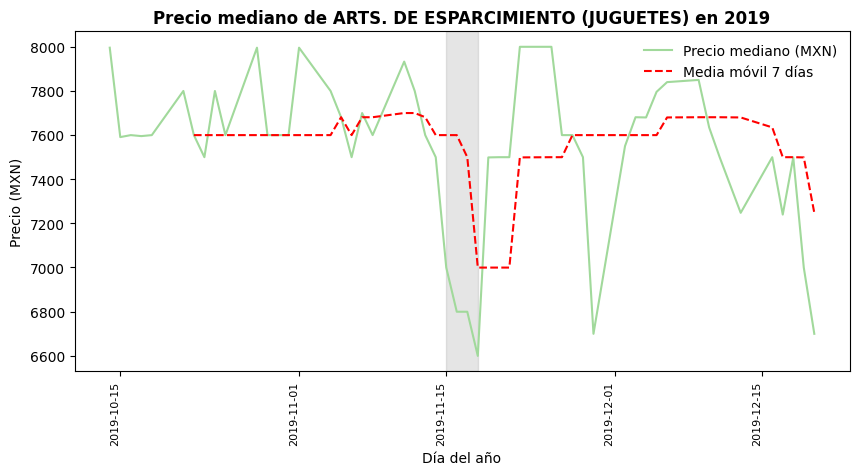

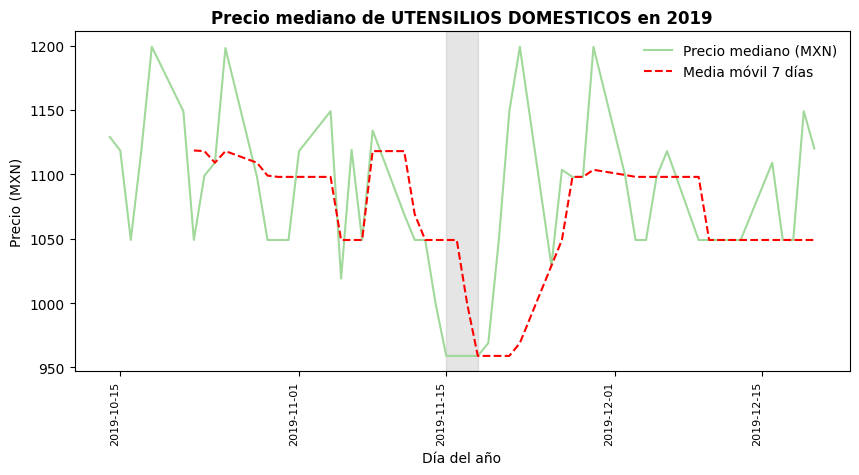

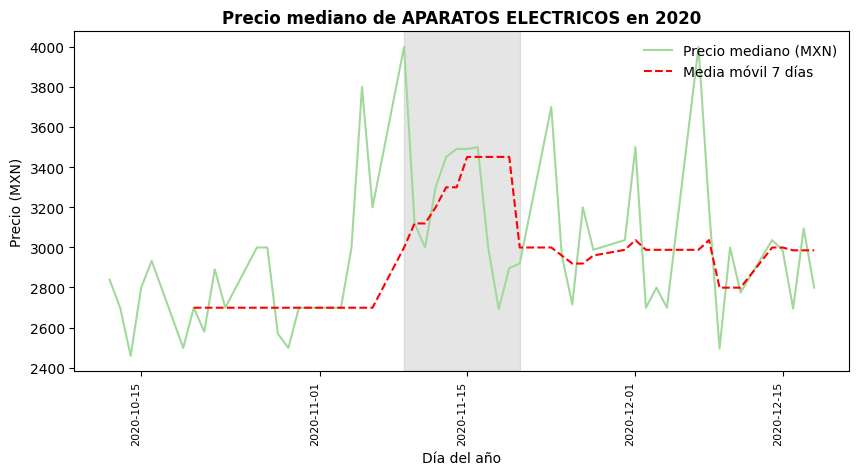

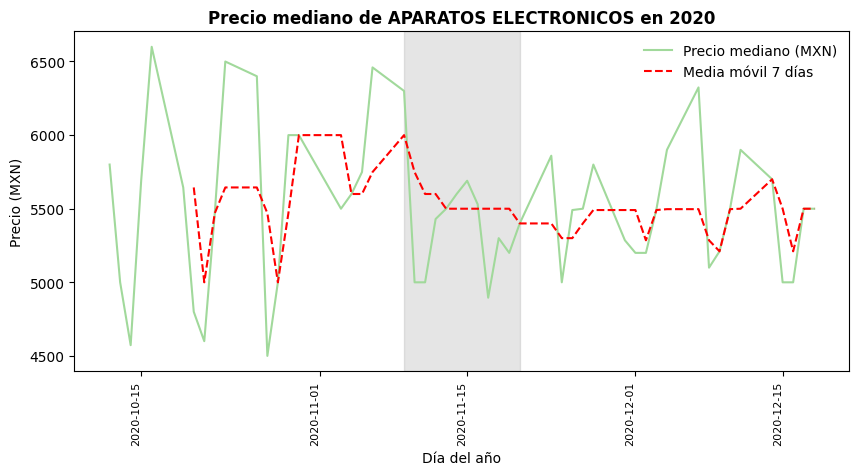

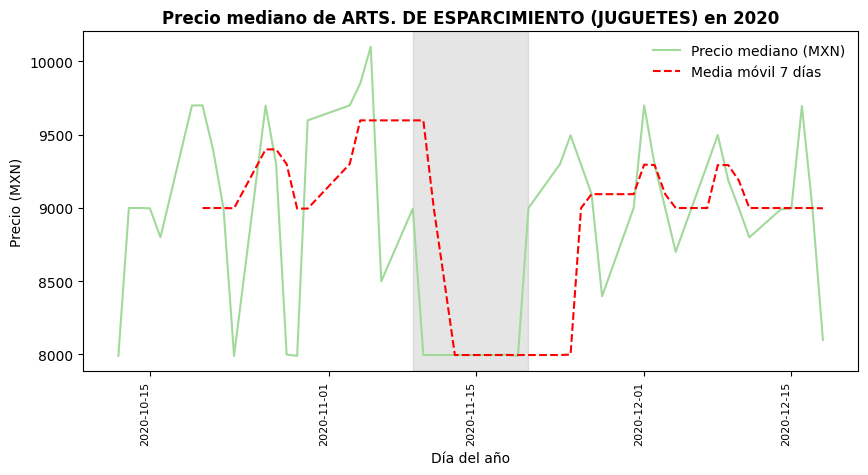

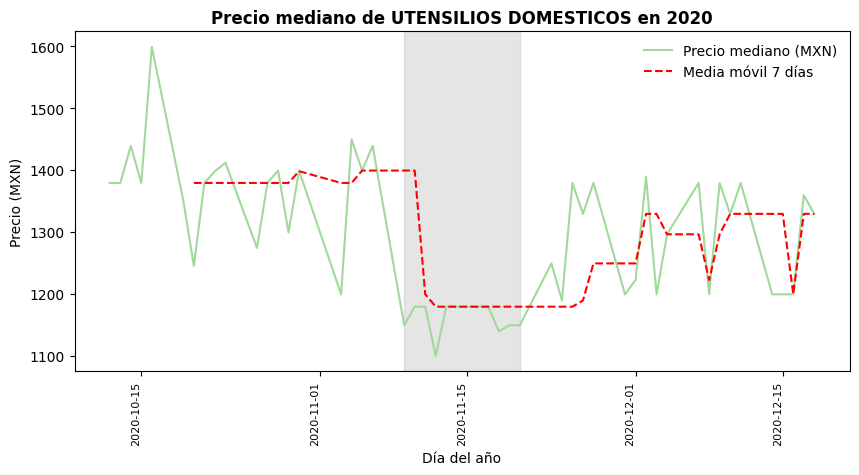

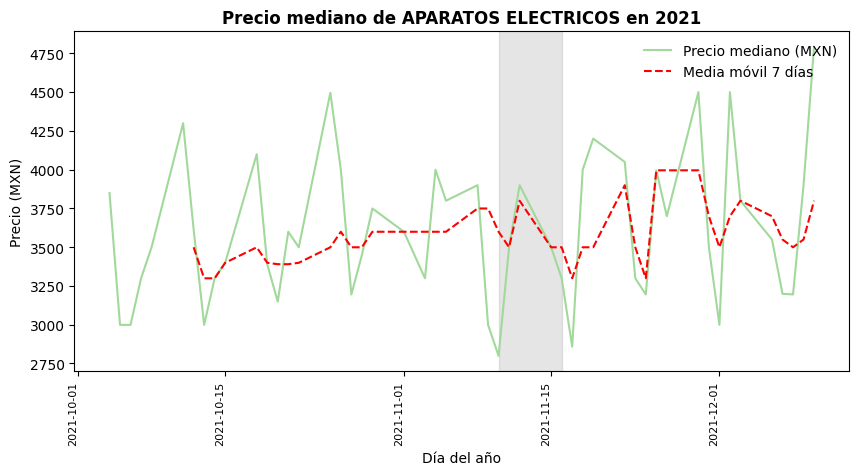

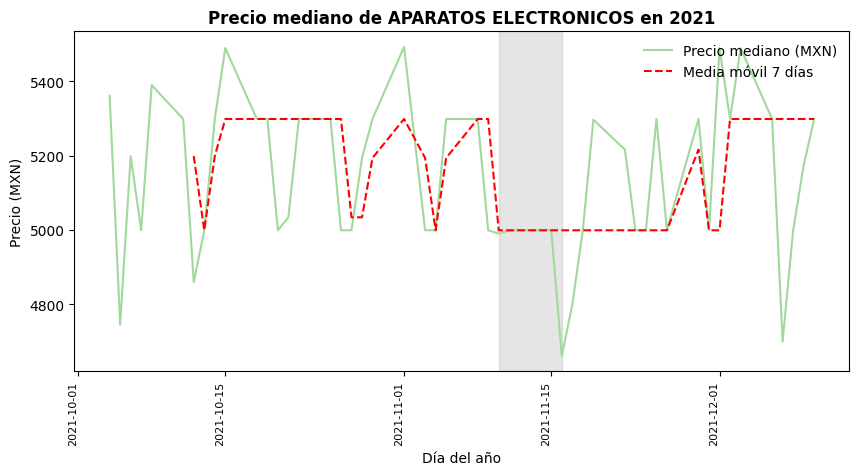

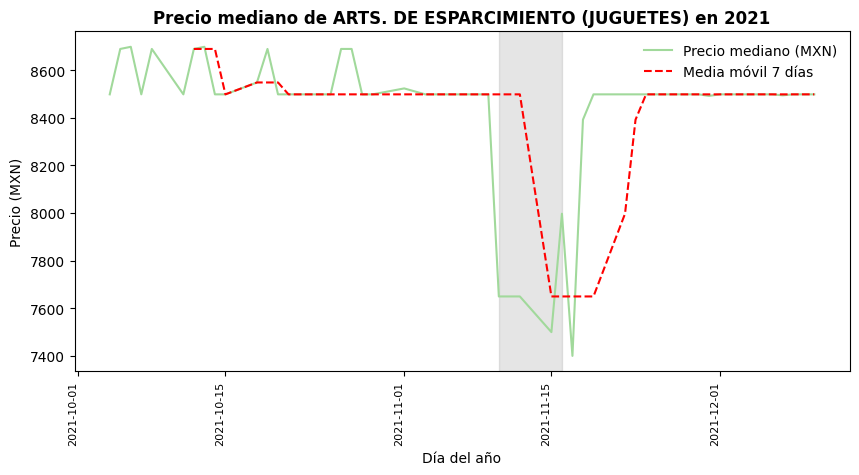

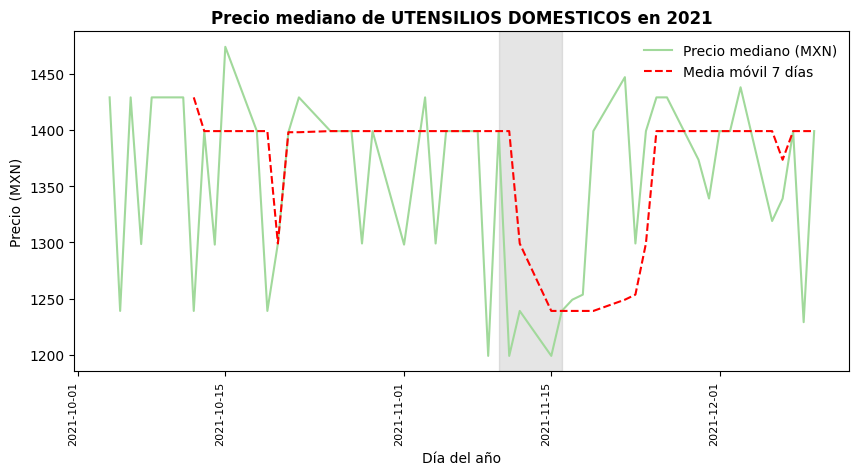

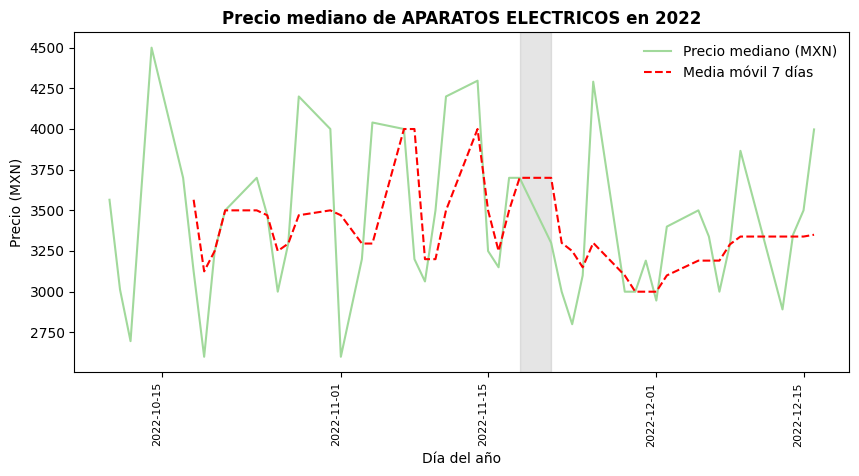

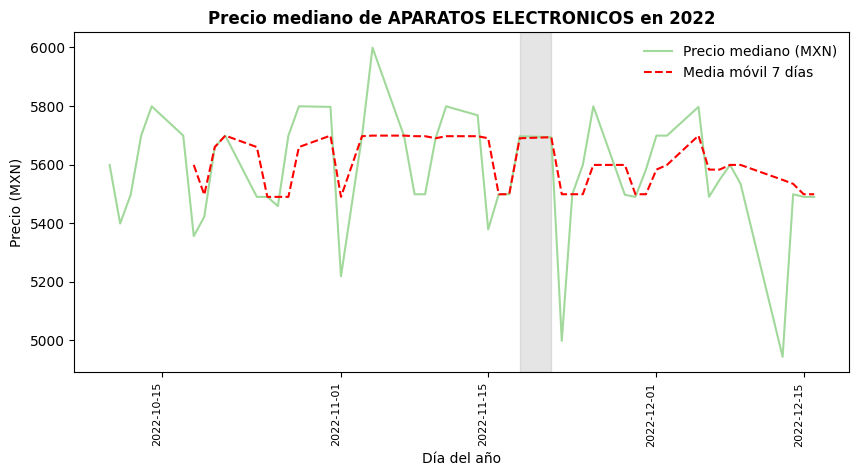

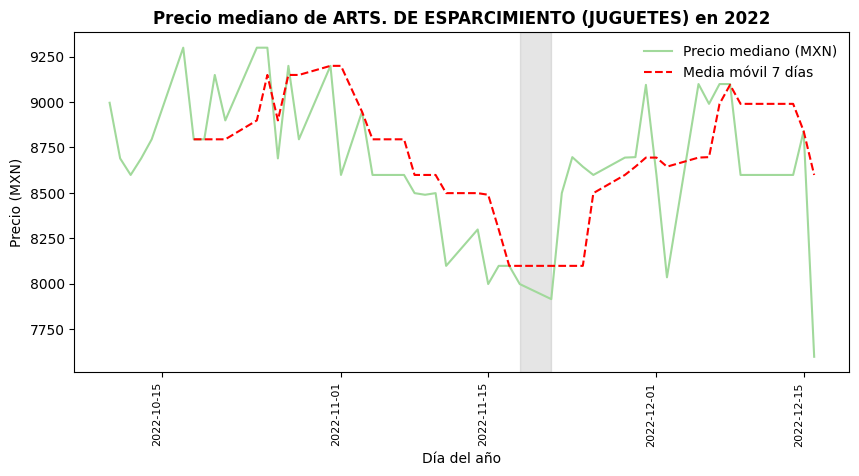

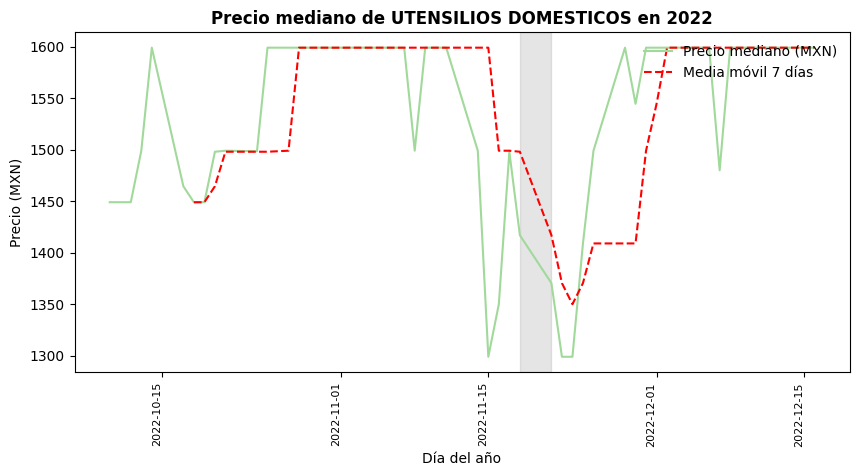

In [31]:
#graficar por día para cada producto
for year in electrodomesticos["fecharegistro"].dt.year.unique():
    for producto in electrodomesticos["categoria"].unique():
        electrodomesticos_year = electrodomesticos[electrodomesticos["fecharegistro"].dt.year==year]
        electrodomesticos_year = electrodomesticos_year[electrodomesticos_year["categoria"]==producto]
        electrodomesticos_year = electrodomesticos_year.groupby("fecharegistro").median()
        electrodomesticos_year.plot(y="precio",figsize=(10,5),color="#a1d99b")
        #media movil de 4 semanas
        electrodomesticos_year["precio"].rolling(7).median().plot(figsize=(10,5),style="r--")
        #Precio máximo
        electrodomesticos_max = electrodomesticos_year["precio"].max()
        electrodomesticos_min = electrodomesticos_year["precio"].min()
        #plt.axhline(electrodomesticos_max, color="r", linestyle="--")
        #plt.axhline(electrodomesticos_min, color="r", linestyle="--")
        #Incluir área de Buen Fin con base en la lista periods. Poner el área en gris con transparencia 0.2 y etiquetarla con "Buen Fin"
        for period in periods:
            start_date, end_date = period.split("_")
            start_week = datetime.datetime.strptime(start_date, "%Y-%m-%d")
            end_week = datetime.datetime.strptime(end_date, "%Y-%m-%d")
            if year == int(start_date[:4]):
                plt.axvspan(start_week, end_week, alpha=0.2, color='grey')
                #plt.text(start_week+1, (electrodomesticos_year["precio"].min() + electrodomesticos_year["precio"].max())/2, "Buen Fin", size=8, weight="bold")


                # Add titles, labels and legend
        plt.xticks(rotation=90, size=8)
        plt.grid(False)
        plt.title("Precio mediano de "+producto+" en "+str(year), size=12, weight="bold")
        plt.xlabel("Día del año")
        plt.ylabel("Precio (MXN)")
        plt.legend(['Precio mediano (MXN)','Media móvil 7 días'], frameon=False,loc='upper right')
            #Eliminar los